In [1]:
#Importing the necessary datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('D:\\DataScience\\Term 1\\8.IML\\1.Models\\1.Regression\\1.kNN\\6.Housing price prediction\\kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Observations

#Irrelavant columns such as id,zipcode,lat,long can be removed
#All columns as numeric
#Target column is price

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#There are no null values

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#There are outliers in the bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_living15

In [9]:
#Dropping irrelavant columns

df = df.drop(['id','lat','long'],axis = 1)

In [10]:
df.shape

(21597, 18)

In [11]:
#The row to column ratio is good

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


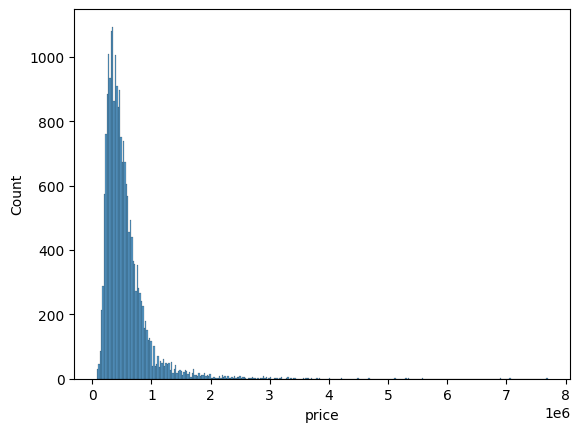

In [14]:
#Univariate analysis

sns.histplot(data = df,x = 'price')
plt.show()

In [13]:
#The data is right skewed

Text(0, 0.5, 'No of houses built')

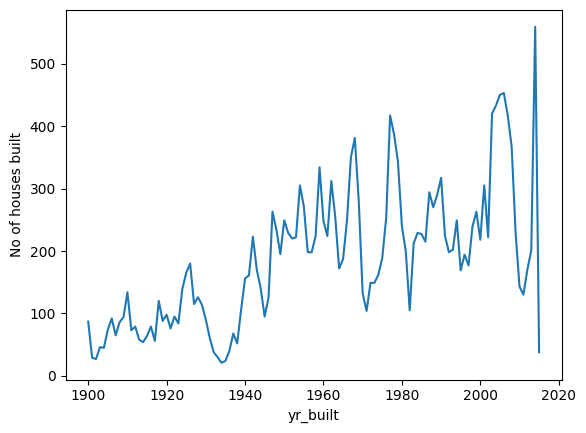

In [41]:
df['bathrooms'].groupby(df['yr_built']).count().plot(kind = 'line')
plt.ylabel('No of houses built')

In [35]:
#The no of houses built has increased over the years

In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Text(0, 0.5, 'Area of the living area in house in Sqft')

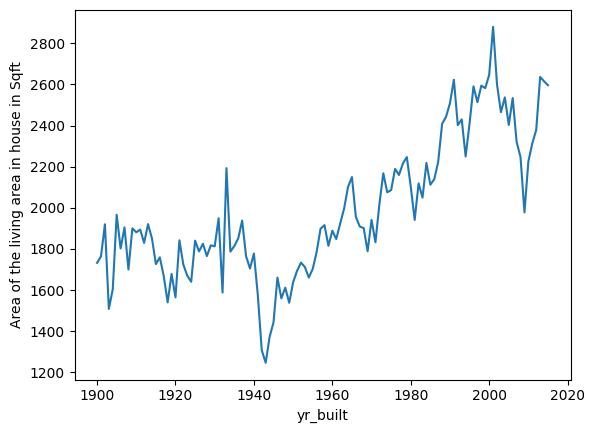

In [40]:
df['sqft_living'].groupby(df['yr_built']).mean().plot(kind = 'line')
plt.ylabel('Area of the living area in house in Sqft')

In [39]:
#The area of the houses is increasing over the years

<Axes: xlabel='yr_built'>

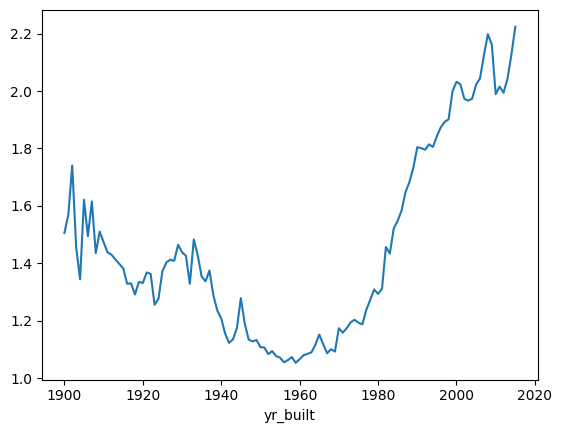

In [42]:
df['floors'].groupby(df['yr_built']).mean().plot(kind = 'line')

In [43]:
#The avg no of floors has decreased till 1960 and from 1960 the floors per house started increasing

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sqft_living', ylabel='price'>

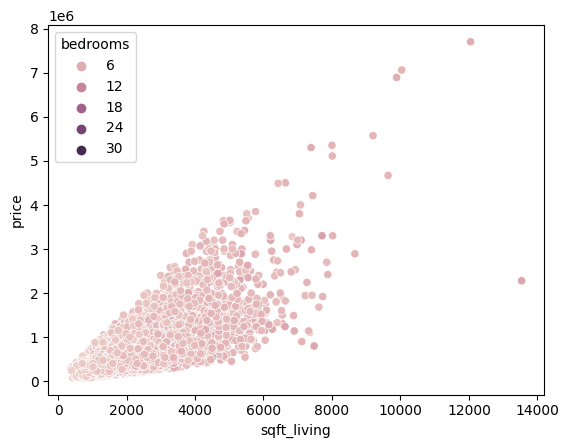

In [46]:
#Bivariate analysis

sns.scatterplot(data = df,y = 'price',x = 'sqft_living',hue = 'bedrooms')

In [47]:
#There is a linear correlation b/w the sqft and price

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sqft_living', ylabel='price'>

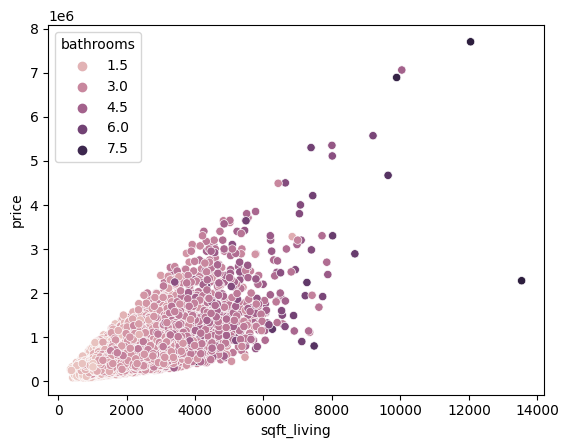

In [48]:
#Bivariate analysis

sns.scatterplot(data = df,y = 'price',x = 'sqft_living',hue = 'bathrooms')

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='bedrooms', ylabel='price'>

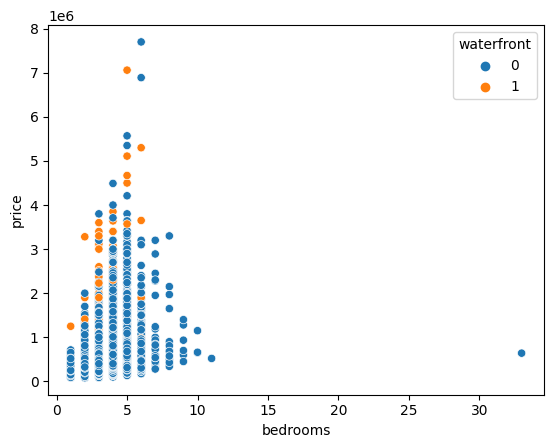

In [50]:
#Bivariate analysis

sns.scatterplot(data = df,y = 'price',x = 'bedrooms',hue = 'waterfront')

In [51]:
#The houses with the waterfront are more pricier than the houses without the waterfront

In [52]:
#Multivaraite analysis

df.select_dtypes(include='number').corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.280102,-0.010722
waterfront,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,0.086507,0.030781
view,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.280681,0.072904
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.713867,0.120981


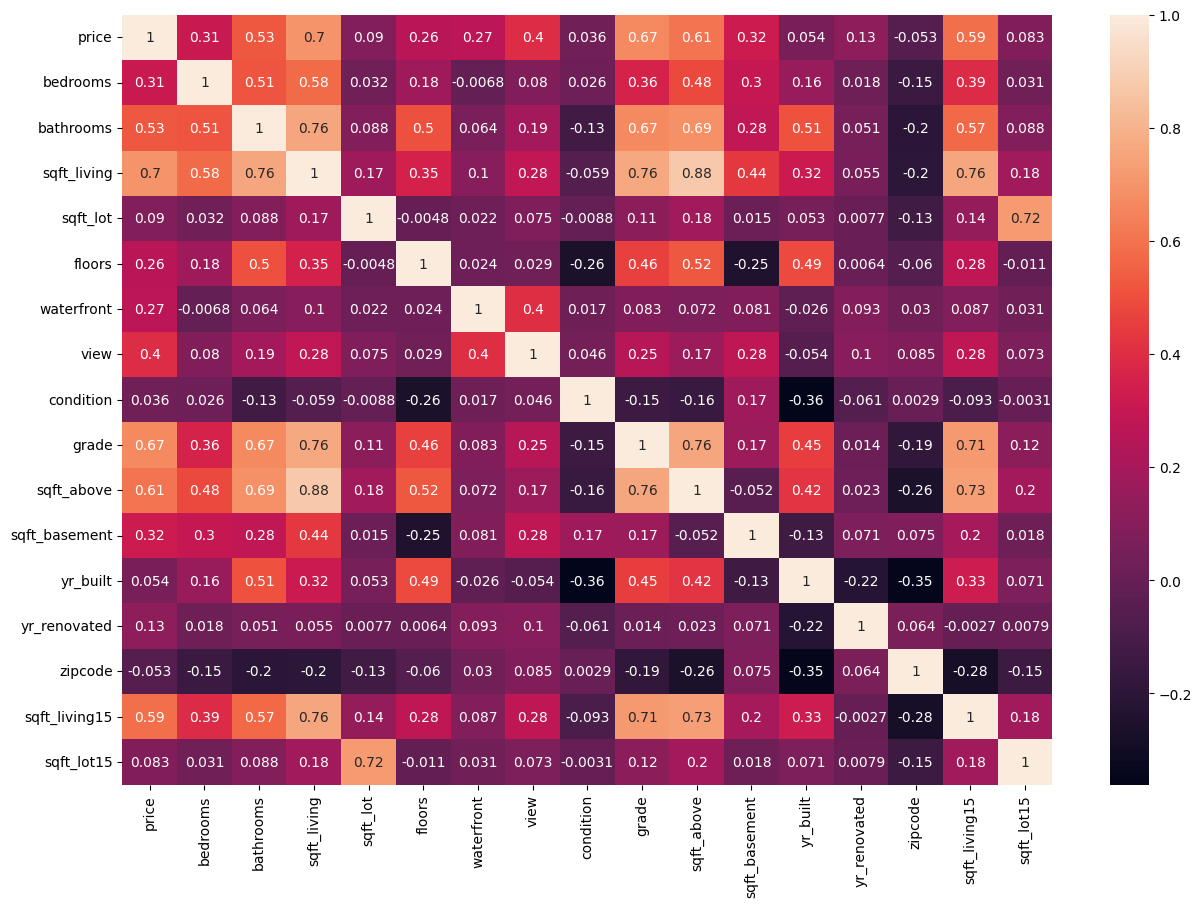

In [56]:
plt.figure(figsize = (15,10))
sns.heatmap(data = df.select_dtypes(include='number').corr(),annot = True)
plt.show()

In [68]:
#Data Cleaning

df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [58]:
#There are no null values

In [80]:
#Outlier filter

df_num = df.select_dtypes(include = 'number')

In [81]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [82]:
lower_bound

price           -67500.0
bedrooms             1.5
bathrooms            0.0
sqft_living         60.0
sqft_lot         -1686.5
floors              -0.5
waterfront           0.0
view                 0.0
condition            1.5
grade                5.5
sqft_above         -15.0
sqft_basement     -660.0
sqft_living15      415.0
sqft_lot15       -1050.0
elapsed_years      -45.0
dtype: float64

In [83]:
upper_bound

price            912500.0
bedrooms              5.5
bathrooms             4.0
sqft_living        3500.0
sqft_lot          15397.5
floors                3.5
waterfront            0.0
view                  0.0
condition             5.5
grade                 9.5
sqft_above         3065.0
sqft_basement      1100.0
sqft_living15      3095.0
sqft_lot15        14550.0
elapsed_years       139.0
dtype: float64

In [84]:
df = df[~((df_num<lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [85]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,elapsed_years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,36
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819,28


In [66]:
df = df.drop(['date','zipcode'],axis=1)

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819


In [69]:
df['elapsed_years'] = 2023 - df['yr_built']

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,elapsed_years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,36
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,2238,6819,28


In [71]:
df = df.drop('yr_renovated',axis=1)

In [72]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,elapsed_years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,36
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,2238,6819,28


In [73]:
df = df.drop('yr_built',axis=1)

In [74]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,elapsed_years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,36
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,2238,6819,28


In [86]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,elapsed_years
count,13642.000000,13642.000000,13642.000000,13642.000000,13642.000000,13642.000000,13642.0,13642.0,13642.000000,13642.000000,13642.000000,13642.000000,13642.000000,13642.000000,13642.000000
mean,419418.308532,3.205688,1.934082,1728.552338,6703.196892,1.466024,0.0,0.0,3.414529,7.316889,1525.188609,203.363730,1740.439745,6661.977789,51.735303
std,161006.274438,0.749598,0.638139,540.578414,3042.218991,0.551471,0.0,0.0,0.644877,0.767680,538.247092,317.694471,457.824490,2800.197715,29.266536
min,82000.000000,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,620.000000,651.000000,8.000000
25%,294912.500000,3.000000,1.500000,1310.000000,4504.500000,1.000000,0.0,0.0,3.000000,7.000000,1120.000000,0.000000,1400.000000,4644.250000,25.000000
50%,395000.000000,3.000000,2.000000,1680.000000,6896.000000,1.000000,0.0,0.0,3.000000,7.000000,1400.000000,0.000000,1670.000000,7000.000000,49.000000
75%,525000.000000,4.000000,2.500000,2100.000000,8682.750000,2.000000,0.0,0.0,4.000000,8.000000,1838.500000,400.000000,2030.000000,8500.000000,71.000000
max,910000.000000,5.000000,3.500000,3500.000000,15375.000000,3.500000,0.0,0.0,5.000000,9.000000,3065.000000,1100.000000,3090.000000,14550.000000,123.000000


C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


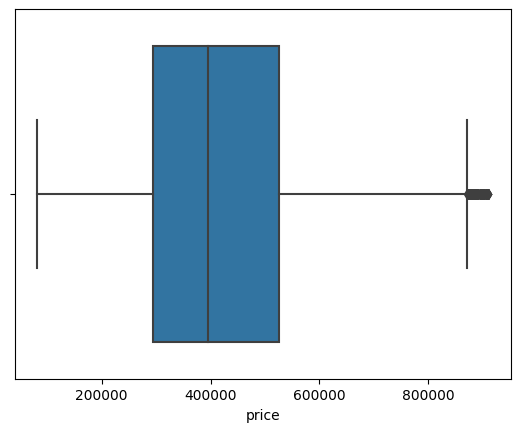

In [87]:
sns.boxplot(data = df,x = 'price')
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


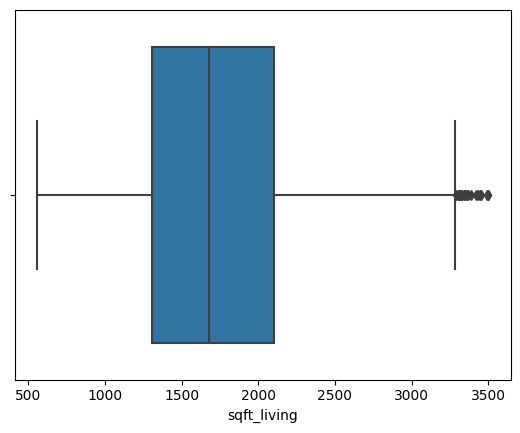

In [88]:
sns.boxplot(data = df,x = 'sqft_living')
plt.show()

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


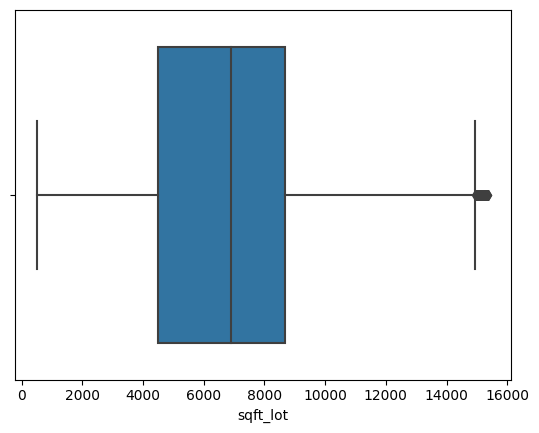

In [89]:
sns.boxplot(data = df,x = 'sqft_lot')
plt.show()

In [90]:
X = df.drop('price',axis = 1)

In [91]:
y = df['price']

In [92]:
X_num = X.select_dtypes(include = 'number')

In [93]:
X_cat = X.select_dtypes(include = 'object')

In [94]:
X_num_scaled = MinMaxScaler().fit_transform(X_num)

In [95]:
X_num_scaled = pd.DataFrame(X_num_scaled,columns = X_num.columns,index = X_num.index)

In [96]:
X_num_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,elapsed_years
0,0.333333,0.090909,0.210884,0.345338,0.0,0.0,0.0,0.333333,0.333333,0.270793,0.000000,0.291498,0.359666,0.521739
2,0.000000,0.090909,0.071429,0.638169,0.0,0.0,0.0,0.333333,0.000000,0.112186,0.000000,0.850202,0.533204,0.713043
3,0.666667,0.818182,0.476190,0.301582,0.0,0.0,0.0,1.000000,0.333333,0.220503,0.827273,0.299595,0.312900,0.434783
4,0.333333,0.454545,0.380952,0.508920,0.0,0.0,0.0,0.333333,0.666667,0.464217,0.000000,0.477733,0.492985,0.243478
6,0.333333,0.545455,0.392857,0.424032,0.4,0.0,0.0,0.333333,0.333333,0.477756,0.000000,0.655061,0.443773,0.173913


In [98]:
X = X_num_scaled

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10913, 14), (2729, 14), (10913,), (2729,))

In [101]:
k_values = np.arange(1,22,2)
train_mape_values = []
test_mape_values = []
cv_mape_values = []

In [105]:
for i in k_values:
    #Training the model
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    
    #Predicting the y_hat_train and computing the error
    pred_train = model.predict(X_train)
    error_train = mean_absolute_percentage_error(y_train,pred_train)
    train_mape_values.append(error_train)
    
    #Predicting the y_hat_test and computng the error
    pred_test = model.predict(X_test)
    error_test = mean_absolute_percentage_error(y_test,pred_test)
    test_mape_values.append(error_test)
    
    #CV 
    
    cv_score = -cross_val_score(model,X,y,cv= 5,scoring = 'neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_score)
    cv_mape_values.append(cv_mape)

In [106]:
train_mape_values

[0.003589903437592228,
 0.1746452029080772,
 0.1965869435156755,
 0.2069894268095678,
 0.21304263420921662,
 0.21801146002490307,
 0.2210516308463824,
 0.2232703678655448,
 0.22559876327837453,
 0.2270483231634096,
 0.22843845348140193]

In [107]:
test_mape_values

[0.2824586351329258,
 0.24488024964847208,
 0.23788321547380462,
 0.23634673995229022,
 0.2362245733111826,
 0.23585836046465214,
 0.2354960907394715,
 0.2343200718809136,
 0.23476823339258962,
 0.23547712011384572,
 0.2352077866415874]

In [108]:
cv_mape_values

[0.29533448336156753,
 0.25285786002227695,
 0.24441148197888457,
 0.24218241224438097,
 0.24066351048659987,
 0.23980163542385768,
 0.23968756016687628,
 0.23921996316204974,
 0.23927403834975797,
 0.23957991833921466,
 0.23987584236356962]

C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chall\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

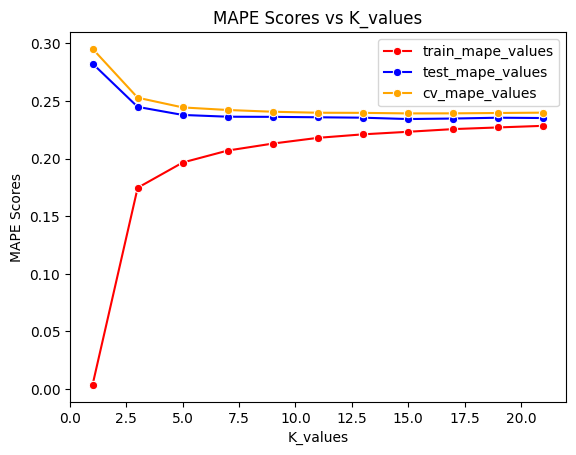

The best k_value:  15


In [113]:
sns.lineplot(x = k_values,y = train_mape_values,color = 'Red',marker = 'o',label = 'train_mape_values')
sns.lineplot(x = k_values,y = test_mape_values,color = 'blue',marker = 'o',label = 'test_mape_values')
sns.lineplot(x = k_values,y = cv_mape_values,color = 'orange',marker = 'o',label='cv_mape_values')
plt.xlabel('K_values')
plt.ylabel('MAPE Scores')
plt.title('MAPE Scores vs K_values')
plt.show()

#best_cv_value_is
best_k_cv = k_values[np.argmin(cv_mape_values)]
print("The best k_value: ",best_k_cv)